# Landfast Sea Ice (Mahoney)

## Background
This curation notebook is for Andy Mahoney's Landfast Sea Ice data set. Currently these data are found in the directories `/workspace/CKAN/CKAN_Data/InteRFACE/Beaufort/` and `.../Chukchi/`.

The data in this notebook correspond to the following [publication](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/2006JC003559):

>Mahoney, A., Eicken, H., Gaylord, A. G., and Shapiro, L. (2007), Alaska landfast sea ice: Links with bathymetry and atmospheric circulation, <i>J. Geophys. Res.,</i> 112, C02001, doi:10.1029/2006JC003559. 

Users of these data should use the above citation, and are encouraged to read the publication as well.

### What to know about these data

* What
  * Landfast ice is sea ice that is continguous to the coast and is stable for approximately 20 days.
  * Islands are excluded except for Herschel and Barter Islands.
* Where
  * The spatial domain is northern Alaska and northwestern Canada and Point Barrow marks the boundary between the Chukchi and Beaufort Seas.
* When
  * The data represent eight annual (1996-2004) landfast ice cycles that span October to July.
* How
  * The data are derived from RADARSAT-1 data aquired using the the high-resolution ScanSAR operation mode of the synthetic aperture radar (SAR) sensor.
    * C-Band (5.3 GHz), 5.6 cm wavelength, HH polarization
    * The satellite can "see" landfast ice because it has a distinct backscatter signature.
    * There is an average 10-day period between SAR mosaics.
* Why?
  * From the publication, quote:
    >In the Arctic, landfast sea ice is a key element of the coastal system, integral to a wide range of geological and biological processes as well as human activities. The presence of landfast ice can mitigate the effect of winter storms on the coast but also impede navigation in the spring. As well as being of great importance to native subsistence activities [Nelson, 1969; George et al., 2004], the presence or absence of landfast in northern Alaska and its stability are of considerable economic importance for offshore development.

#### Key Acronyms
 - SLIE: Seaward Looking Landfast Ice Edge
 - LFIW: Landfast Ice Width
 - SAR: Synthetic Aperature Radar
- - - -
## Data Expectations
### Data Variables
* SLIE (a line representing the minimum offshore extent of continguous stationary ice during the three mosaic (~20 day) period)
  * Details
    * Seaward and inshore (spring only) edges are distinguished.
    * Advancing SLIE is assigned the mean date of the first of the three mosaics.
    * Retreating ice edge is the mean date of the last mosaic.
    * Different parts of the ice may be retreating and advancing at the same time, so this is why such a date scheme is applied.
  * Data Formats + Volumes
    * There should be mosaic images where SLIE is delineated
    * Each mosaic consists of imagery spanning a 2 to 3 day period.
    * 28 to 35 mosaics per annual ice cycle.
    * 238 mosaics total.
    * Landfast ice is defined using a set of three mosaics (spanning ~20 days).
    * Ideally these are gridded in a known geospatial format
    * 222 SLIEs were delineated in this study.
  * Flavors
    * Annual summaries indicating the fraction of the annual cycle (October to July) that a pixel is occupied by landfast ice.
    * Monthly (October to July) min / mean / max SLIE positions
* LFIW (Landfast Ice Width)
  * Details
    * Measured along transects (N=1935) where distance between the coast and the SLIE was measured.
      * These transects were thena baainned into 200 groups for which means were calculated.
  * Data Formats and Volumes
    * There should be 200 point locations that contain a time series of LFIW.
    * Ideally these are in a tabular format (CSV) or some point vector geometry (.shp).
* Water Depth at the SLIE
    * Details
      * Bathymetry is important to sea ice. Sometimes the 20 m isobath resembles the SLIE.
      * This was measured for the same 200 transects described for LFIW.
      * Assume that water depths in which the SLIE is most frequently observed correspond to depths in which the SLIE is most stable
    * Flavors
      * Modal Water Depth by Month
* Key Events in the annual ice cyclea
  * Details
    * The 200 coastal point locations used to bin the transects have time series data to identify the key events in the ice cycle, including:
      1. The first ice on coasts (first occurence of more than 500 m of ice at the coast)
      2. onset of stable landfast ice (stable period is the longest period in which the SLIE occupies water of 15 m or deeper).
      3. Breakup (fastest reduction in LFIW during the tail of the season when landfast ice is no longer advancing)
      4. Ice-free coasts (LFIW is less than 500 m).
   * But not all cycles have these events because of data availability! Landfast was already present along an average of 67% of the coast in 1996, 1997, and 1998, when the first available mosaics were acquired. In the remaining years this only occurred in 6% of time series. These occurrences and the entire first 3 years are excluded from the analysis of the dates of the first ice on coasts event. All four events have an error of +- 5 days.


## Known Unknows
How do these data relate to this entry at the NSIDC?

https://nsidc.org/sites/nsidc.org/files/G02173-V001-UserGuide.pdf

Based on our conversations with the relevants PIs we know these are somehow (potentially very closely) related to this dataset we have here.

## Data Digging
This notebook assumes that these data are copied to `$SCRATCH_DIR`. Set this environment variable via your shell or just run the code cell below to do the same thing. Note that the `GDAL_DATA` and `PROJ_LIB` environment variables may not be set when the environment is activated (possible anaconda-project issue) if they are already set in the parent conda env. You can set them explicitly here if needed. 

In [2]:
import os
os.environ["SCRATCH_DIR"] = "/atlas_scratch/kmredilla/ardac/landfast_seaice/"
# env_path = "envs/default/share/"
# os.environ["PROJ_LIB"] = f"{env_path}/proj"
# os.environ["GDAL_DATA"] = f"{env_path}/gdal"

Here is the directory structure without any files displayed:

In [32]:
!tree $SCRATCH_DIR -d

/atlas_scratch/kmredilla/ardac/landfast_seaice/
├── Beaufort
│   ├── 1998-99
│   │   └── Mosaics_1998-99
│   ├── 1999-00
│   │   └── Mosaics_1999-00
│   ├── 2000-01
│   │   └── Mosaics_2000-01
│   ├── 2001-02
│   │   └── Mosaics_2001-02
│   │       ├── NotUsed
│   │       ├── PrudhoeBay
│   │       └── Unused
│   ├── 2002-03
│   │   └── Mosaics_2002-03
│   ├── 2003-04
│   │   └── Mosaics_2003-04
│   ├── 2004-05
│   ├── 2005-06
│   ├── 2006-07
│   ├── 2007-08
│   └── AllSeasonsAnalysis
│       ├── MonthlySLIEs
│       │   ├── ASCII_Data
│       │   │   └── mean
│       │   ├── ASCII_geocoords
│       │   │   ├── Shapefiles
│       │   │   └── WithHeaders
│       │   └── MinMeanMax
│       │       └── ASCIIGeoCoords_AKAlb
│       └── SLIE_Events
├── Chukchi
│   ├── 1996-97
│   ├── 1997-98
│   ├── 1998-99
│   ├── 1999-00
│   ├── 2000-01
│   ├── 2001-02
│   ├── 2002-03
│   ├── 2003-04
│   ├── 2004-05
│   ├── 2005-06
│   ├── 2006-07
│   ├── 2007-08
│   └── AllSeasonsAnalysis
│       ├── Mon

We can assume the basic organizational scheme here is regional (Chukchi Sea vs. Beaufort Sea) and then temporal (by annual ice season or summary of all seasons). However, it is clear from the directories alone that we do not have a homogenous data structure across regions or ice seasons. Let's take a closer look at a few directories.

In [33]:
!tree $SCRATCH_DIR/Beaufort/2004-05

/atlas_scratch/kmredilla/ardac/landfast_seaice//Beaufort/2004-05
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── r2004_276-304_slie.tif
├── r2004_286-315_slie.tif
├── r2004_300-328_slie.tif
├── r2004_313-336_slie.tif
├── r2004_324-345_slie.tif
├── r2004_334-352_slie.tif
├── r2004_343-360_slie.tif
├── r2004_348-010_slie.tif
├── r2004_358-017_slie.tif
├── r2005_006-027_slie.tif
├── r2005_015-041_slie.tif
├── r2005_025-051_slie.tif
├── r2005_039-058_slie.tif
├── r2005_049-065_slie.tif
├── r2005_054-075_slie.tif
├── r2005_063-089_slie.tif
├── r2005_073-099_slie.tif
├── r2005_087-113_slie.tif
├── r2005_097-123_slie.tif
├── r2005_111-128_slie.tif
├── r2005_120-137_slie.tif
├── r2005_126-152_slie.tif
├── r2005_135-161_slie.tif
├── r2005_150-168_slie.tif
├── r2005_157-178_slie.tif
├── r2005_166-190_slie.tif
├── r2005_174-195_slie.tif
├── r2005_188-211_slie.tif
├── sliedatenum.csv
├── sliedatestr.csv
├── SLIEdgestack_2004-05.tif
├── SLI

In [34]:
!tree $SCRATCH_DIR/Chukchi/2004-05

/atlas_scratch/kmredilla/ardac/landfast_seaice//Chukchi/2004-05
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── r2004_279-304_slie.tif
├── r2004_294-321_slie.tif
├── r2004_303-328_slie.tif
├── r2004_318-338_slie.tif
├── r2004_326-345_slie.tif
├── r2004_334-352_slie.tif
├── r2004_342-362_slie.tif
├── r2004_351-010_slie.tif
├── r2004_358-017_slie.tif
├── r2005_006-027_slie.tif
├── r2005_016-041_slie.tif
├── r2005_024-051_slie.tif
├── r2005_040-058_slie.tif
├── r2005_048-065_slie.tif
├── r2005_054-075_slie.tif
├── r2005_063-089_slie.tif
├── r2005_072-099_slie.tif
├── r2005_087-113_slie.tif
├── r2005_096-123_slie.tif
├── r2005_111-137_slie.tif
├── r2005_121-147_slie.tif
├── r2005_135-161_slie.tif
├── r2005_144-168_slie.tif
├── r2005_159-178_slie.tif
├── r2005_166-189_slie.tif
├── r2005_174-195_slie.tif
├── r2005_188-209_slie.tif
├── sliedatenum.csv
├── sliedatestr.csv
├── SLIEstack_2004-05_col.tif
├── SLIEstack_2004-05.tif
├── SLIE

This directory comparison is actually quite promising - we see the key variables (SLIE, LFIW, and Water Depth (convention appears to be `wdep`). The SLIE data are in GeoTIFF format, and it appears that the individual mosaics (across ~10 day periods) and a stacked annual summary mosaic is also available. The Water Depth and LFIW data are tabular, and we'd expect 200 records, one for each transect bin. It appears there are some statistical summaries for each of these also. I'm guessing that the `reg` and `mo` conventions in those .csv filenames stand for `region` and `monthly`, respectively. Finally, note that these two directories contain a different number of files. This is expected and caused by differences in satellite revist frequency. However, not all things are equal between the Beaufort and Chukchi regions, as there are directories for 1996-87 and 1997-98 in the Chukchi directory, but not the Beaufort. Also, there are some oddball data structures where the two regions both have data. Consider the case of the 1999-2000 ice season:

In [35]:
!tree $SCRATCH_DIR/Beaufort/1999-00

/atlas_scratch/kmredilla/ardac/landfast_seaice//Beaufort/1999-00
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── Mosaics_1999-00
│   ├── r1999_276-279_mos.tif
│   ├── r1999_288-290_mos.tif
│   ├── r1999_295-297_mos.tif
│   ├── r1999_305-308_mos.tif
│   ├── r1999_315-317_mos.tif
│   ├── r1999_325-327_mos.tif
│   ├── r1999_335-337_mos.tif
│   ├── r1999_345-347_mos.tif
│   ├── r1999_354-358_mos.tif
│   ├── r1999_365-003_mos.tif
│   ├── r2000_010-012_mos.tif
│   ├── r2000_020-022_mos.tif
│   ├── r2000_030-034_mos.tif
│   ├── r2000_040-044_mos.tif
│   ├── r2000_047-050_mos.tif
│   ├── r2000_054-058_mos.tif
│   ├── r2000_065-068_mos.tif
│   ├── r2000_076-078_mos.tif
│   ├── r2000_084-087_mos.tif
│   ├── r2000_096-099_mos.tif
│   ├── r2000_106-109_mos.tif
│   ├── r2000_115-117_mos.tif
│   ├── r2000_126-128_mos.tif
│   ├── r2000_136-140_mos.tif
│   ├── r2000_147-149_mos.tif
│   ├── r2000_156-160_mos.tif
│   ├── r2000_168-171_mos.tif
│ 

In [36]:
!tree $SCRATCH_DIR/Chukchi/1999-00

/atlas_scratch/kmredilla/ardac/landfast_seaice//Chukchi/1999-00
├── lfiw.csv
├── lfiw_moregmean.csv
├── lfiw_moregstdev.csv
├── lfiw_regmean.csv
├── lfiw_regstdev.csv
├── r1999_281-299_slie.tif
├── r1999_292-308_slie.tif
├── r1999_296-317_slie.tif
├── r1999_306-330_slie.tif
├── r1999_316-337_slie.tif
├── r1999_329-347_slie.tif
├── r1999_336-361_slie.tif
├── r1999_344-006_slie.tif
├── r1999_360-020_slie.tif
├── r2000_003-030_slie.tif
├── r2000_019-037_slie.tif
├── r2000_027-044_slie.tif
├── r2000_036-054_slie.tif
├── r2000_043-068_slie.tif
├── r2000_051-078_slie.tif
├── r2000_067-085_slie.tif
├── r2000_074-094_slie.tif
├── r2000_084-102_slie.tif
├── r2000_092-116_slie.tif
├── r2000_099-126_slie.tif
├── r2000_115-140_slie.tif
├── r2000_123-150_slie.tif
├── r2000_139-157_slie.tif
├── r2000_147-164_slie.tif
├── r2000_156-174_slie.tif
├── r2000_163-188_slie.tif
├── r2000_170-198_slie.tif
├── sliedatenum.csv
├── sliedatestr.csv
├── SLIEstack_1999-00_col.tif
├── SLIEstack_1999-00.tif
├── SLIE

It seems that the Beaufort directories also contain the individual mosaics as well as the SLIE (delineated from a set of three mosaics). We'll want to take a closer look at both the SLIE delineations, and the mosaics. It is also not really clear what the various "stack" or "edgestack" or "color" or "col" version of SLIE data are, so that needs to be dug into as well. Next, we'll take a look at the "All Season" directories.

In [37]:
!tree $SCRATCH_DIR/Chukchi/AllSeasonsAnalysis

/atlas_scratch/kmredilla/ardac/landfast_seaice//Chukchi/AllSeasonsAnalysis
├── lfiw_all.csv
├── MonthlySLIEs
│   ├── ASCII_Data
│   │   ├── lfiw_mo5m_max.csv
│   │   ├── lfiw_mo5m_max_slieN.csv
│   │   ├── lfiw_mo5m_mean.csv
│   │   ├── lfiw_mo5m_median.csv
│   │   ├── lfiw_mo5m_min.csv
│   │   ├── lfiw_mo5m_min_slieN.csv
│   │   ├── lfiw_mo5m_mode.csv
│   │   ├── lfiw_mo5m_N.csv
│   │   ├── lfiw_mo5m_stdev.csv
│   │   ├── wdep_mo5m_max.csv
│   │   ├── wdep_mo5m_mean.csv
│   │   ├── wdep_mo5m_median.csv
│   │   ├── wdep_mo5m_min.csv
│   │   ├── wdep_mo5m_mode.csv
│   │   ├── wdep_mo5m_N.csv
│   │   └── wdep_mo5m_stdev.csv
│   ├── ASCII_geocoords
│   │   ├── moSLIE_01_max_geo.csv
│   │   ├── moSLIE_01_mean_geo.csv
│   │   ├── moSLIE_01_median_geo.csv
│   │   ├── moSLIE_01_min_geo.csv
│   │   ├── moSLIE_02_max_geo.csv
│   │   ├── moSLIE_02_mean_geo.csv
│   │   ├── moSLIE_02_median_geo.csv
│   │   ├── moSLIE_02_min_geo.csv
│   │   ├── moSLIE_03_max_geo.csv
│   │   ├── moSLIE_03_mean_geo.c

In [38]:
!tree $SCRATCH_DIR/Beaufort/AllSeasonsAnalysis

/atlas_scratch/kmredilla/ardac/landfast_seaice//Beaufort/AllSeasonsAnalysis
├── lfiw_all.csv
├── lfiw_all.xlsx
├── MonthlySLIEs
│   ├── ASCII_Data
│   │   ├── Current_mag+dir.csv
│   │   ├── Current_mag+dir.xls
│   │   ├── lfiw_mo5m_max.csv
│   │   ├── lfiw_mo5m_max_slie.csv
│   │   ├── lfiw_mo5m_max_slieN.csv
│   │   ├── lfiw_mo5m_max_slie.xlsx
│   │   ├── lfiw_mo5m_max.xlsx
│   │   ├── lfiw_mo5m_mean.csv
│   │   ├── lfiw_mo5m_median.csv
│   │   ├── lfiw_mo5m_min.csv
│   │   ├── lfiw_mo5m_min_slie.csv
│   │   ├── lfiw_mo5m_min_slieN.csv
│   │   ├── lfiw_mo5m_min_slie.xlsx
│   │   ├── lfiw_mo5m_min.xlsx
│   │   ├── lfiw_mo5m_mode.csv
│   │   ├── lfiw_mo5m_N.csv
│   │   ├── lfiw_mo5m_stdev.csv
│   │   ├── mean
│   │   │   ├── SLIE_mean01.csv
│   │   │   ├── SLIE_mean02.csv
│   │   │   ├── SLIE_mean03.csv
│   │   │   ├── SLIE_mean04.csv
│   │   │   ├── SLIE_mean05.csv
│   │   │   ├── SLIE_mean06.csv
│   │   │   ├── SLIE_mean07.csv
│   │   │   ├── SLIE_mean08.csv
│   │   │   ├── SLIE_mean

OK these directories have some important-looking monthly summaries that definitely correspond to the monthly summary SLIE data we identified in initial data expectations. We might be able to reproduce these data from the seasonal data. We'll definitely revist these directories!

### Data Puzzle Number 1: What's up with the mosaics?

There seem to be two main types of raster data here: SLIE (`_slie` suffix) and mosaics (`_mos` suffix) for the Beaufort region. We should know how do the `mos` files differ from the `_slie` files. We should also know how the different SLIE `stack` flavors differ within each region and ice season. First, let's look at the mosaic data. How many files are there? What is in them? I'm *guessing* these are just the mosaiced and processed backscatter images, and we might actually not need them in the curated version of the dataset because they're a low-level product and not available for all regions and seasons.

In [3]:
# import the usual data tools
import random
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
from pathlib import Path
from multiprocessing import Manager, Pool
from copy import deepcopy
pd.set_option("display.precision", 1)
random.seed(907)

In [4]:
scratch_dir = Path(os.getenv("SCRATCH_DIR"))
mosaic_fps = [x for x in scratch_dir.rglob("*mos.tif")]

def get_year(fp):
    year = re.match(r'.*([1-3][0-9]{3})', fp).group(1)
    return year

n_fps = len(mosaic_fps)
mosaic_years = set([get_year(x.name) for x in mosaic_fps])
regions = set([x.parts[5] for x in mosaic_fps])

print(f"%d mosaic geotiffs in the region %s region across the following ice seasons:\n %s" % (n_fps, str(regions), str(mosaic_years)))

177 mosaic geotiffs in the region {'Beaufort'} region across the following ice seasons:
 {'2004', '2001', '2003', '1999', '2000', '2002'}


OK it clear that we are missing mosaic geotiffs for many ice seasons and for all of the Chukchi region. I'm not too concerned about this because I think it confirms that these are a lower-level data product that won't be a fit for the ultimate curated collection. The full count of mosaics should be closer to the N=238 described in the publication. But, to be on the safe side we can pop a few of these GeoTIFFs open and take a look.

In [5]:
def get_doy(fp):
    doy = re.match(r'.*([0-3][0-9][0-9]-[0-3][0-9][0-9])', fp).group(1)
    return doy

def generate_mos_di(rstrs):
    
    di = {}
    
    for fp in rstrs:
        trimmed_fp = fp.name[:-4]
        year = get_year(trimmed_fp)
        doy = get_doy(trimmed_fp)
        fp_key = year + " Mosaic for DOY range: " + doy
        di[fp_key] = {}
        with rasterio.open(fp) as src:
            arr = src.read(1).astype(float)
            arr[arr == src.nodata] = np.nan
            di[fp_key]["fp"] = fp
            di[fp_key]["arr"] = arr
            di[fp_key]["min"] = np.round(np.nanmin(arr), 2)
            di[fp_key]["max"] = np.round(np.nanmax(arr), 2)
            di[fp_key]["mean"] = np.round(np.nanmean(arr), 2)
            di[fp_key]["sd"] = np.round(np.nanstd(arr), 2)
            di[fp_key]["width"] = arr.shape[1]
            di[fp_key]["height"] = arr.shape[0]
            di[fp_key]["year"] = year
            di[fp_key]["pixel_size_m"] = src.profile["transform"][0]
    return di

nine_mosaic_fps = random.sample(mosaic_fps, 9)
mosaic_di = generate_mos_di(nine_mosaic_fps)
mosaic_di

{'2000 Mosaic for DOY range: 156-160': {'fp': PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/1999-00/Mosaics_1999-00/r2000_156-160_mos.tif'),
  'arr': array([[ 67., 121., 155., ..., 152., 145.,   0.],
         [ 79.,  89., 156., ..., 127., 161.,   0.],
         [ 71.,  48.,  82., ..., 148., 155.,   0.],
         ...,
         [  0.,   0.,   0., ...,  62.,  85.,   0.],
         [  0.,   0.,   0., ...,  27.,  75.,   0.],
         [  0.,   0.,   0., ...,  62.,  62.,   0.]]),
  'min': 0.0,
  'max': 255.0,
  'mean': 87.24,
  'sd': 40.32,
  'width': 9554,
  'height': 3298,
  'year': '2000',
  'pixel_size_m': 100.0},
 '1999 Mosaic for DOY range: 162-166': {'fp': PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/1998-99/Mosaics_1998-99/r1999_162-166_mos.tif'),
  'arr': array([[122., 128.,  96., ...,   0.,   0.,   0.],
         [ 72., 120., 104., ...,   0.,   0.,   0.],
         [ 87., 101., 138., ...,   0.,   0.,   0.],
         ...,
         [127., 187., 1

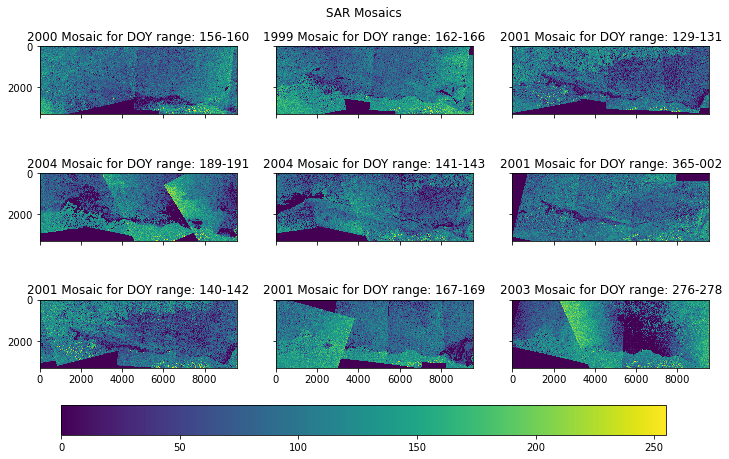

In [6]:
def plot_mos_maps(di):

    fig, axs = plt.subplots(3, 3, figsize=(12, 7), sharex=True, sharey=True)
    fig.patch.set_facecolor("white")
    plt.suptitle("SAR Mosaics", y=0.9)
    plt.subplots_adjust(hspace=0)
    vmax = 255
    vmin = 0

    for ax, k in zip(axs.flatten(), di.keys()):
        ax.imshow(di[k]["arr"], vmin=vmin, vmax=vmax, cmap="viridis", interpolation="none")
        ax.set_title(k)

    cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
    fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")

plot_mos_maps(mosaic_di)

Yep, these are 100 m x 100 m spatial resolution SAR mosaics that are normalized to an integer data type across the 8 bit (0 to 255) range. We can set these mosaics aside for now.

### Data Puzzle Number 2: Flavors of SLIE
We know from our initial dig into the directory and file structures that there are a few different styles of SLIE products: SLIE delineated from individual mosaics, "stacked" SLIE data that encompass an entire ice season, and then "stacked" with some type of "color" or "edge" modifier. To keep it simple we can try to assess the SLIEs derived from individual mosaics first.

* Chukchi and Beaufort regions both have `SLIEstack_color+edge_<year>.tif`
* Chukchi and Beaufort regions both have `SLIEstack_<year>.tif`
* Chukchi has `SLIEstack_<year>_col.tif`
* Beaufort has `SLIEdgestack_<year>.tif`

There are also some other CSVs with these data: `sliedatenum.csv` and `sliedatestr.csv`

In [7]:
slie_fps = [x for x in scratch_dir.rglob("*_slie.tif")]
n_slie_fps = len(slie_fps)
n_slie_fps

566

In [8]:
manager = Manager()

def mp_generate_slie_di(di, fp):

        trimmed_fp = fp.name[:-4]
        ice_season = fp.parts[-2]
        year = get_year(trimmed_fp)
        doy = get_doy(trimmed_fp)
        if "Beaufort" in str(fp):
            region = "Beaufort"
        elif "Chukchi" in str(fp):
            region = "Chukchi"
        else:
            region = "None"
        fp_key = year + " " + region + " SLIE for DOY range: " + doy
        
        di[fp_key] = manager.dict()
        di[fp_key]["fp"] = fp
        di[fp_key]["region"] = region
        di[fp_key]["year"] = year
        di[fp_key]["ice_season"] = ice_season
        
        with rasterio.open(fp) as src:
            arr = src.read(1).astype(float)
            arr[arr == src.nodata] = np.nan
            #di[fp_key]["arr"] = arr
            di[fp_key]["min"] = np.round(np.nanmin(arr), 2)
            di[fp_key]["max"] = np.round(np.nanmax(arr), 2)
            di[fp_key]["mean"] = np.round(np.nanmean(arr), 2)
            di[fp_key]["sd"] = np.round(np.nanstd(arr), 2)
            di[fp_key]["width"] = arr.shape[1]
            di[fp_key]["height"] = arr.shape[0]
            di[fp_key]["pixel_size_m"] = src.profile["transform"][0]


d = manager.dict()
pool = Pool(32)
for fp in slie_fps:
    pool.apply_async(mp_generate_slie_di, args=(d, fp))
pool.close()
pool.join()

In [9]:
slie_di = dict(deepcopy(d))
for k in slie_di.keys():
    slie_di[k] = dict(deepcopy(d[k]))
del d
slie_di

{'2000 Beaufort SLIE for DOY range: 295-328': {'fp': PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2000-01/r2000_295-328_slie.tif'),
  'region': 'Beaufort',
  'year': '2000',
  'ice_season': '2000-01',
  'min': 0.0,
  'max': 255.0,
  'mean': 41.19,
  'sd': 64.43,
  'width': 9554,
  'height': 3298,
  'pixel_size_m': 100.0},
 '2001 Beaufort SLIE for DOY range: 001-027': {'fp': PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2000-01/r2001_001-027_slie.tif'),
  'region': 'Beaufort',
  'year': '2001',
  'ice_season': '2000-01',
  'min': 0.0,
  'max': 255.0,
  'mean': 49.95,
  'sd': 74.75,
  'width': 9554,
  'height': 3298,
  'pixel_size_m': 100.0},
 '2000 Beaufort SLIE for DOY range: 326-345': {'fp': PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2000-01/r2000_326-345_slie.tif'),
  'region': 'Beaufort',
  'year': '2000',
  'ice_season': '2000-01',
  'min': 0.0,
  'max': 255.0,
  'mean': 45.93,
  'sd': 70.33,
  'width': 9554,
  'hei

In [11]:
def df_from_di(di):
    df = pd.DataFrame.from_dict(di).T
    #del df["arr"]
    return df

In [12]:
slie_df = df_from_di(slie_di)

In [13]:
reg_season_count = slie_df[['region','ice_season']].value_counts()
min_count = slie_df['min'].value_counts()
max_count = slie_df['max'].value_counts()
ps_count = slie_df['pixel_size_m'].value_counts()
width_count = slie_df[['region', 'width']].value_counts()
height_count = slie_df[['region', 'height']].value_counts()

In [14]:
reg_season_count.groupby(["ice_season", "region"]).unique()

ice_season  region  
1996-97     Chukchi     [25]
1997-98     Chukchi     [24]
1998-99     Chukchi     [28]
1999-00     Beaufort    [29]
            Chukchi     [27]
2000-01     Beaufort    [28]
            Chukchi     [28]
2001-02     Beaufort    [33]
            Chukchi     [26]
2002-03     Beaufort    [27]
            Chukchi     [26]
2003-04     Beaufort    [27]
            Chukchi     [26]
2004-05     Beaufort    [28]
            Chukchi     [27]
2005-06     Beaufort    [27]
            Chukchi     [27]
2006-07     Beaufort    [27]
            Chukchi     [29]
2007-08     Beaufort    [24]
            Chukchi     [23]
dtype: object

In [15]:
height_count

region    height
Chukchi   6271      316
Beaufort  3298      250
dtype: int64

In [16]:
width_count

region    width
Chukchi   6234     316
Beaufort  9554     250
dtype: int64

In [17]:
ps_count

100.0    566
Name: pixel_size_m, dtype: int64

This looks good. All SLIE GeoTIFFs have 100 m pixels, and the Chukchi and Beaufort regions are internally consistent. We have different counts for each ice season which again is expected because of satellite data availability. It does seem odd that there are no data for the Beaufort region for the ice seasons of 1996-97, 1997-98, and 1998-99.

In [18]:
min_count

0.0    566
Name: min, dtype: int64

In [19]:
max_count

255.0    557
128.0      9
Name: max, dtype: int64

All data are in the 0 to 255 range, but it weird that 9 of the 566 geotiffs have a max value of 128 instead of 255. We'll want to take a closer look at those!

In [20]:
slie_df[slie_df["max"] == 128.0]

,fp,region,year,ice_season,min,max,mean,sd,width,height,pixel_size_m
2001 Beaufort SLIE for DOY range: 189-210,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2001,2000-01,0.0,128.0,36.7,57.9,9554,3298,100.0
2004 Beaufort SLIE for DOY range: 170-191,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2004,2003-04,0.0,128.0,36.7,57.9,9554,3298,100.0
2004 Beaufort SLIE for DOY range: 179-200,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2004,2003-04,0.0,128.0,36.7,57.9,9554,3298,100.0
2004 Beaufort SLIE for DOY range: 189-211,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2004,2003-04,0.0,128.0,36.7,57.9,9554,3298,100.0
2002 Beaufort SLIE for DOY range: 179-203,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2002,2001-02,0.0,128.0,36.7,57.9,9554,3298,100.0
2002 Beaufort SLIE for DOY range: 193-211,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2002,2001-02,0.0,128.0,36.7,57.9,9554,3298,100.0
2002 Beaufort SLIE for DOY range: 275-306,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2002,2002-03,0.0,128.0,36.7,57.9,9554,3298,100.0
2003 Beaufort SLIE for DOY range: 183-210,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Beaufort,2003,2002-03,0.0,128.0,36.7,57.9,9554,3298,100.0
1999 Chukchi SLIE for DOY range: 185-207,/atlas_scratch/kmredilla/ardac/landfast_seaice...,Chukchi,1999,1998-99,0.0,128.0,51.0,49.4,6234,6271,100.0


In [24]:
slie_max128_fps = slie_df[slie_df["max"] == 128.0]["fp"].values

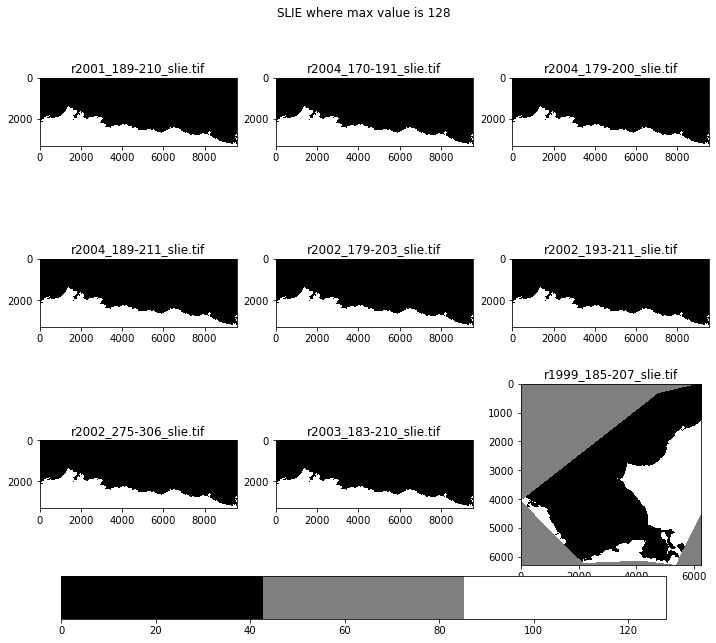

In [22]:
import matplotlib.cm as cm

fig, axs = plt.subplots(3, 3, figsize=(12, 10))
fig.patch.set_facecolor("white")
plt.suptitle("SLIE where max value is 128", y=0.9)
plt.subplots_adjust(hspace=0)

cmap = cm.get_cmap('gray', 3)
vmax = 128
vmin = 0

for ax, fp in zip(axs.flatten(), slie_max128_fps):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        ax.imshow(arr, vmin=vmin, vmax=vmax, cmap=cmap, interpolation="none")
        ax.set_title(fp.name)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")


In these plots it seems that 0 indicates water or no SLIE and that 128 indicates a landmask. Let's compare against a few other SLIE scenes that have the full range (0 to 255) of values. There is definitely some weird stuff in that last Chukchi scene, right?

In [26]:
slie_max255_fps = random.sample(list(slie_df[slie_df["max"] == 255.0]["fp"].values), 9)
slie_max255_fps

[PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Chukchi/2006-07/r2007_054-079_slie.tif'),
 PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/1999-00/r2000_065-087_slie.tif'),
 PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2005-06/r2005_318-339_slie.tif'),
 PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2007-08/r2007_293-319_slie.tif'),
 PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Chukchi/2003-04/r2003_339-364_slie.tif'),
 PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/2003-04/r2004_037-058_slie.tif'),
 PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Chukchi/2007-08/e2008_139-165_slie.tif'),
 PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Chukchi/1998-99/r1999_133-154_slie.tif'),
 PosixPath('/atlas_scratch/kmredilla/ardac/landfast_seaice/Beaufort/1999-00/r2000_188-212_slie.tif')]

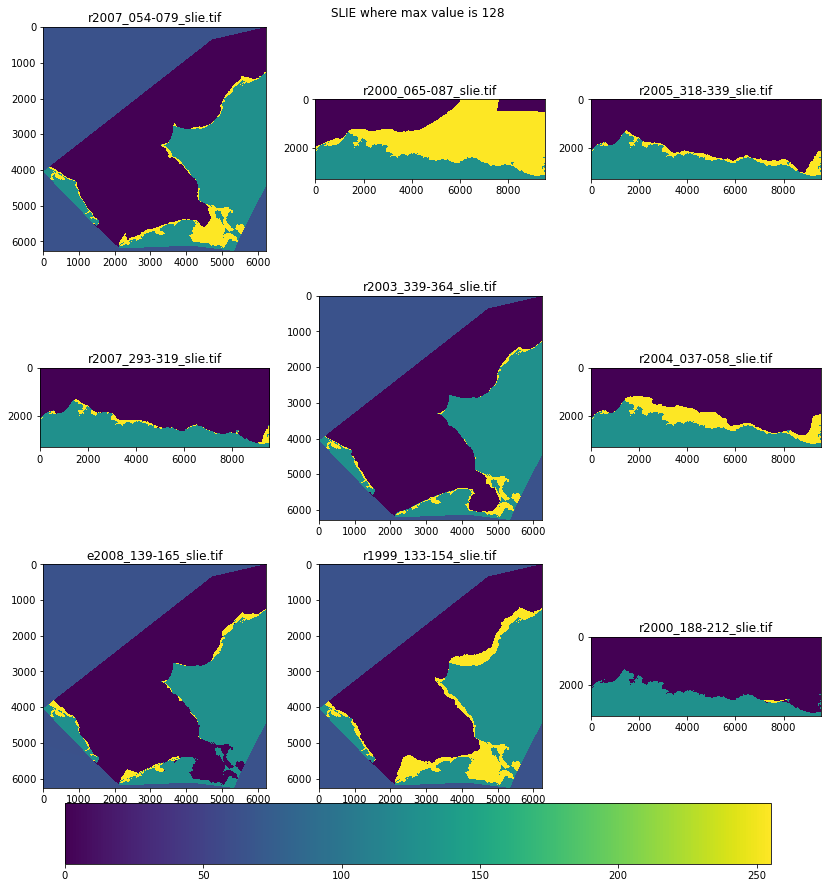

In [30]:
fig, axs = plt.subplots(3, 3, figsize=(14, 14))
fig.patch.set_facecolor("white")
plt.suptitle("SLIE where max value is 128", y=0.9)

vmax = 255
vmin = 0

for ax, fp in zip(axs.flatten(), slie_max255_fps):
    with rasterio.open(fp) as src:
        arr = src.read(1)
        ax.imshow(arr, vmin=vmin, vmax=vmax, cmap="viridis", interpolation="none")
        ax.set_title(fp.name)

cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.06])
fig.colorbar(axs[0,0].images[0], cax=cbar_ax, orientation="horizontal")


In [31]:
for fp in slie_max255_fps:
    with rasterio.open(fp) as src:
        arr = src.read(1)
        print(np.unique(arr))

[  0  63  64 128 255]
[  0 128 255]
[  0 128 255]
[  0 128 255]
[  0  64 128 255]
[  0 128 255]
[  0  63  64 128 255]
[  0  64 128 255]
[  0 128 255]


Wow, OK, these unique values indicate a few interesting things:
 - 0 (purple): No SLIE is present for this pixel. This means either water, or sea-ice that is NOT landfast.
 - 255 (yellow): landfast sea ice (SLIE) is present for this fixel
 - 128 (green): A landmask. The landmask appears constant across each geotiff.
 - 63, 64, etc. (blue): To my eye these pixels are "NoData" as they are consistent across the Chukchi scenes and occupy primarily edges and corners in the images.
 
The nine scenes with no 255 values are consistent with this scheme, those scenes just did not have any detectable landfast sea ice.

Next we can look at the different "stacked" flavors of SLIE.

In [ ]:
temp_fp = list(scratch_dir.glob("Beaufort/2004-05/r*.tif"))[0]

with rio.open(temp_fp) as src:
    temp_arr = src.read(1)
    
print("Beaufort 'slie' sample file:", temp_fp)
print("metadata:", src.meta)

plt.figure(figsize=(10, 5))
plt.imshow(temp_arr, interpolation="none")
plt.colorbar()
plt.show()

print("Unique values:\n", np.unique(temp_arr))

So these data are indeed fundamentally different. 

SLIE at least is clearly showing the AK coastline and seems to be a binary variable, where 0 indicates no SLIE, 128 indicates SLIE, and 255 indicates landmask.
Based on the metadata, these data are on grids of the same size: 9554x3298, and no `nodata` value is specified for either. Also, according to the affine transforms, while they have the same resolution of 100m, they have only slightly different centerpoints:

In [ ]:
from rasterio.plot import show

temp_fps = [
    list(scratch_dir.glob("Beaufort/1998-99/Mosaics_1998-99/r*.tif"))[1],
    list(scratch_dir.glob("Beaufort/2004-05/r*.tif"))[0]
]

# make a checkerboard array for visualizing the grids
checker_arr = np.indices((3, 3)).sum(axis=0) % 2

# setup a plot for showing the grids side-by-side
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(7, 4), sharey=True, sharex=True)

for fp, ax in zip(temp_fps, axs):
    with rio.open(fp) as src:
        print(f"{fp.name} upper-left pixel x & y coordinates: ", [src.meta["transform"][i] for i in (2, 5)])
        # plot the checker arr using the grid transform of each with constant x and y axes
        show(checker_arr, transform=src.transform, ax=ax)

## SLIE files

What's in the different files with the SLIE data?

`SLIEdgestack_<year>.tif`

In [ ]:
sorted(list(scratch_dir.glob("Beaufort/*/SLIEdgestack*")))

In [ ]:
fp = list(scratch_dir.glob("Beaufort/2004-05/SLIEdgestack*"))[0]

with rio.open(fp) as src:
    temp_arr = src.read(1)

plt.figure(figsize=(10, 5))
plt.imshow(temp_arr, interpolation="none")
plt.colorbar()
plt.show()

print("Unique values:\n", np.unique(temp_arr))
print("Metadata:", src.meta)

No `nodata` again, but this transform matches that of the mosaic data. Also, WKT string for CRS instead of EPSG code, that doesn't match what is derived using the `rasterio.crs.CRS` class:

In [ ]:
from rasterio.crs import CRS

CRS.from_epsg(3338).to_wkt()

This `SLIEdgestack_<year>.tif` file is not present in the Chukchi folders, although there is another file present there called `SLIEstack_<year>_col.tif` - is there some correspondence between these?

`SLIEstack_<year>_col.tif`

In [ ]:
sorted(list(scratch_dir.glob("*/*/SLIEstack*col.tif")))

In [ ]:
fp = list(scratch_dir.glob("Chukchi/1998-99/SLIEstack*col.tif"))[0]

with rio.open(fp) as src:
    temp_arr = src.read(1)

plt.figure(figsize=(10, 5))
plt.imshow(temp_arr, interpolation="none")
plt.colorbar()
plt.show()

print("Unique values:\n", np.unique(temp_arr))
print("Metadata:", src.meta)

This doesn't appear to be the case given the values of 29 over land. This looks more similar to some of the following files.

`SLIEstack_<year>.tif`

In [ ]:
# filter out paths with names containing "+" or "_col"
[fp for fp in scratch_dir.glob("*/*/SLIEstack_*.tif") if (len(str(fp).split("+")) == 1) & (len(str(fp).split("_col")) == 1)]

In [ ]:
fp = list(scratch_dir.glob("Beaufort/2007-08/SLIEstack_2*"))[0]

with rio.open(fp) as src:
    temp_arr = src.read(1)

print("filepath: ", fp)

plt.figure(figsize=(10, 5))
plt.imshow(temp_arr, interpolation="none")
plt.colorbar()
plt.show()

print("Unique values:\n", np.unique(temp_arr))
print("Metadata:", src.meta)

Different from the `SLIEdgestack` file, seems to have the same metadata as the data files.

`SLIEstack_color+edge_<year>.tif`

In [ ]:
sorted(list(scratch_dir.glob("*/*/SLIEstack_color+edge_*.tif")))

In [ ]:
fp = list(scratch_dir.glob("Beaufort/2004-05/SLIEstack_color+edge*"))[0]

with rio.open(fp) as src:
    temp_arr = src.read(1)
    
print("filepath: ", fp)

plt.figure(figsize=(10, 5))
plt.imshow(temp_arr, interpolation="none")
plt.colorbar()
plt.show()

print("Unique values:\n", np.unique(temp_arr))
print("Metadata:", src.meta)

Okay, so to summarize the above re: "stack" files:



In [ ]:
import pandas as pd

df = pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/sliedatestr.csv"))
df.head()

In [ ]:
np.unique(df[df.columns[0]], return_counts=True)

Okay, so that is not a very useful structure! mostly tabs, but some rows have relevant names. What do unique values in the columns look like?

In [ ]:
np.unique(df[df.columns[2]], return_counts=True)

In [ ]:
np.unique(df[df.columns[3]], return_counts=True)

In [ ]:
np.unique(df[df.columns[4]], return_counts=True)

Is there a pattern between the ordinal day numbers in the filenames of the columns, and the values of the columns?

First column, `_276-304_`, corresponds to 10/2 and 10/30, date strings are 2004/10/8 and 2004/10/15. 

Second column, `_286-315_`, corresponds to 10/12 and 11/10, date strings are 2004/10/20 and 2004/10/26

Third column, `_300-328_`, corresponds to 10/26 and 11/23, date strings are 2004/11/3 and 2004/11/9

Not much of a patter except dates trings are within the dates of the filenames, and are 6 or 7 days apart, and range of dates in filenames is slightly under 30 days.

Check out the datenum file:

In [ ]:
df = pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/sliedatenum.csv"))
df.head()

In [ ]:
np.unique(df[df.columns[2]], return_counts=True)

Date numbers file looks to correspond date strings file, but unsure what numbers mean. 

## `lfiw_` files

These files appear to be present for all years having SLIE data.

`lfiw.csv`

In [ ]:
df = pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/lfiw.csv"))
df.head()

In [ ]:
np.unique(df[df.columns[0]], return_counts=True)

This seems to follow the same weird layout as the `sliedatestr.csv` files. Not sure here. 

`lfiw_moregmean.csv`

In [ ]:
pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/lfiw_moregmean.csv"))

### `lfiw_moregstdev.csv`

In [ ]:
pd.read_csv(scratch_dir.joinpath("Chukchi/2004-05/lfiw_moregstdev.csv"))

### `lfiw_regmean.csv`

In [ ]:
pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/lfiw_regmean.csv"))

### `lfiw_regstdev.csv`

In [ ]:
pd.read_csv(scratch_dir.joinpath("Chukchi/2004-05/lfiw_regstdev.csv"))

Best guess for these is stats for the number of "success" (ice present) pixels on each of the coastlines for month and observing period. 

## `wdep_` files

These files appear to be present for all years having SLIE data, and match the suffix naming scheme for the `lfiw_` data:

`wdep.csv`

In [ ]:
df = pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/wdep.csv"))
df.head()

Again, same layout as `lfiw.csv` and `sliedatestr.csv` files. Not sure here. 

`wdep_moregmean.csv`

In [ ]:
pd.read_csv(scratch_dir.joinpath("Chukchi/2004-05/wdep_moregmean.csv"))

`wdep_moregstdev.csv`

In [ ]:
pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/wdep_moregstdev.csv"))

`wdep_regmean.csv`

In [ ]:
pd.read_csv(scratch_dir.joinpath("Chukchi/2004-05/wdep_regmean.csv"))

`wdep_regstdev.csv`

In [ ]:
pd.read_csv(scratch_dir.joinpath("Beaufort/2004-05/wdep_regmean.csv"))

Looks like these files have the same structure as the `lfiw_` files, appear to be summary stats that we will need explanation for.

## Assemble SLIE

The SLIE data, being available for both regions, seems like a good place to start making a dataset that we can ingest into Rasdaman. Make sure all of the geoTIFFs open and have the same metadata for a single region:

In [ ]:
def read_tif_meta(fp):
    with rio.open(fp) as src:
        meta = src.meta.copy()
    return meta

meta_list = [read_tif_meta(fp) for fp in scratch_dir.glob("Chukchi/*/r*slie.tif")]

In [ ]:
np.all(meta_list[0] == np.array(meta_list))

It looks like some of these files have a different representation of the CRS within the same region!

In [ ]:
np.where(meta_list[0] != np.array(meta_list))

In [ ]:
meta_list[228]

In [ ]:
meta_list[0]

However, they are the same grid, since they have the same affine transforms:

In [ ]:
np.all(meta_list[0]["transform"] == np.array([meta_di["transform"] for meta_di in meta_list]))

This appears to be just an unintentional inconsistency, perhaps introduced from using older versions of some geospatial software. It looks like some of the older years have an "inverse flattening" value that is not consistent with current version of the GRS 1980 Ellipsoid, which is 298.257222101 ([see here](https://epsg.org/crs_3338/NAD83-Alaska-Albers.html)). They instead have a value of 298.257024882273, so Rasterio's `crs.CRS` class does not recognize the WKT as corresponding to EPSG:3338. This might not pose a problem for ingest into rasdaman, but it is something that should be fixed before making the raw data available.

In [ ]:
sorted(list(scratch_dir.glob("Chukchi/*/r*slie.tif")))

Merge / mosaic SLIE Stack data across regions:

In [ ]:
out_dir = scratch_dir.joinpath("outputs")
out_dir.mkdir(exist_ok=True)

In [ ]:
from rasterio.merge import merge


dummy_fp = out_dir.joinpath("beaufort_dummy.tif")
with rio.open(scratch_dir.joinpath(f"Beaufort/2000-01/SLIEstack_2000-01.tif")) as src:
    dummy_arr = src.read(1)
    dummy_arr = dummy_arr.astype(float)
    dummary_arr = np.nan
    dummy_profile = src.profile.copy()
    dummy_profile.update({"nodata": np.nan, "dtype": rio.float32})
    with rio.open(dummy_fp, "w", **dummy_profile) as dst:
        dst.write(dummy_arr, 1)

        
def get_pom(arr):
    """get percent of max"""
    max_val = arr.max() - 1
    arr[arr == arr.max()] = np.nan
    out_arr[out_arr == 0] = np.nan
    return np.round(arr / max_val, 2)
    

for year in range(1996, 2008):
    year_str = f"{year}-{str(year + 1)[-2:]}"
    tmp_fp = scratch_dir.joinpath(f"{{}}/{year_str}/SLIEstack_{year_str}.tif")
    with rio.open(str(tmp_fp).format("Chukchi")) as src1:
        chuk_profile = src1.profile
        # get percent of max for chukchi
        chuk_arr = get_pom(src1.read(1).astype(float))

    # write percent of max
    chuk_pom_fp = out_dir.joinpath("chukchi_pom.tif")
    chuk_profile.update({"dtype": rio.float32})
    with rio.open(chuk_pom_fp, "w", **chuk_profile) as dst:
        dst.write(chuk_arr, 1)

    if year in [1996, 1997, 1998]:
        beauf_pom_fp = dummy_fp
    else:
        beaufort_fp = str(tmp_fp).format("Beaufort")
        with rio.open(beaufort_fp) as src2:
            beauf_profile = src2.profile
            # get percent of max for chukchi
            beauf_arr = get_pom(src2.read(1).astype(float))

            # write percent of max
            beauf_pom_fp = out_dir.joinpath("beaufort_pom.tif")
            beauf_profile.update({"dtype": rio.float32})
            with rio.open(beauf_pom_fp, "w", **beauf_profile) as dst:
                dst.write(beauf_arr, 1)

    with rio.open(chuk_pom_fp) as src1:
        with rio.open(beauf_pom_fp) as src2:
            out_arr, out_transform = merge([src1, src2])

    # remove temporary POM files
    chuk_pom_fp.unlink(missing_ok=True)
    if year in [1996, 1997, 1998]:
        pass
    else:
        beauf_pom_fp.unlink(missing_ok=True)

    out_arr = out_arr[0]
    out_arr[out_arr == 0] = np.nan

    out_profile = chuk_profile
    out_profile.update({
        "width": out_arr.shape[1],
        "height": out_arr.shape[0],
        "transform": out_transform,
        "nodata": np.nan,
        "dtype": rio.float32,
    })
    out_fp = out_dir.joinpath(f"testing_stack_merge_{year_str}.tif")
    with rio.open(out_fp, "w", **out_profile) as dst:
        dst.write(out_arr, 1)


dummy_fp.unlink()

In [ ]:
out_profile

In [ ]:
with rio.open(out_fp) as src:
    show(src, interpolation="none")


In [ ]:

test_arr[test_arr != np.nanmin(test_arr)] = np.nan
plt.imshow(test_arr, interpolation="none")


In [ ]:
!scp -r /atlas_scratch/kmredilla/ardac/landfast_seaice/outputs/ kmredilla@apollo.snap.uaf.edu:

In [ ]:
ls /atlas_scratch/kmredilla/ardac/landfast_seaice/outputs

In [ ]:
from rasterio.plot import show

out_fps = list(out_dir.glob("*.tif"))
with rio.open(out_fps[3]) as src:
    arr = src.read(1)


In [ ]:
np.unique(arr)

In [ ]:
plt.plot(arr[4500])

In [ ]:
plt.imshow(arr, interpolation="none")

In [ ]:
sorted(list(scratch_dir.glob("*/*/SLIEstack*.tif")))